In [6]:
import skimage.io as ski

In [7]:
img = ski.imread('Data/Training/glioma_tumor/gg (1).jpg')

In [9]:
img.shape, img.size

((512, 512, 3), 786432)

In [11]:
img.min(), img.mean(), img.max()

(0, 26.84729766845703, 249)

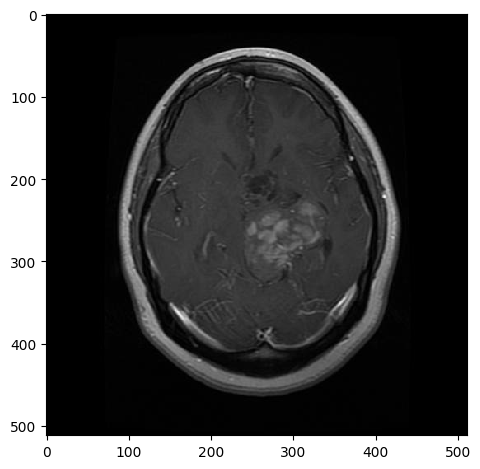

In [12]:
ski.imshow(img)

### Create functions for loading the datasets

In [24]:
def read_images(type):
    import os, numpy as np
    from skimage.io import imread

    if type not in ['Train', 'Test']:
        print("type must be Train or Test")
        return
    
    type = type + "ing"

    training_dir = os.getcwd() + "\Data" + "\\" + type # initialize the training/testing folder
    target_variable = [] # create a list to collect the category
    input_images = [] # create a list to collect the image data

    for sub_category in os.listdir(training_dir): # filter through each sub-category of brain image

        sub_dir = training_dir + "\\" + sub_category

        for i in os.listdir(sub_dir): # filter through each image file in the sub-category

            image_file = sub_dir + "\\" + i

            target_variable.append(sub_category) # add the class to the list

            image = imread(image_file) # read the image into an array   
            input_images.append(image) # add the image to the list
    
    return np.array(input_images), np.array(target_variable)


### Load the train and test sets

In [25]:
train_X, train_Y = read_images("Train")
test_X, test_Y = read_images("Test")

C:\Users\gmandl\AppData\Local\Temp\ipykernel_8984\235384913.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(input_images), np.array(target_variable)


### Explore the distribution of images by tumor type

In [30]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts  = np.unique(train_Y, return_counts=True)

dict(zip(unique, counts))

{'glioma_tumor': 826,
 'meningioma_tumor': 822,
 'no_tumor': 395,
 'pituitary_tumor': 827}

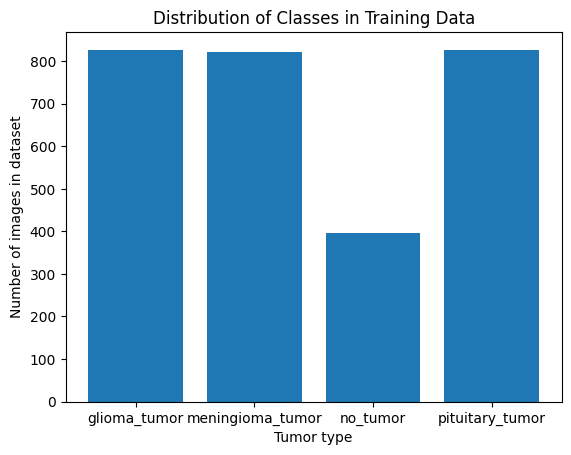

In [36]:
plt.bar(x = unique, height = counts)
plt.xlabel("Tumor type")
plt.ylabel("Number of images in dataset")
plt.title("Distribution of Classes in Training Data")
plt.show()

In [40]:
test_Y = np.array(test_Y)

test_unique, test_counts  = np.unique(test_Y, return_counts=True)

dict(zip(test_unique, test_counts))

{'glioma_tumor': 100,
 'meningioma_tumor': 115,
 'no_tumor': 105,
 'pituitary_tumor': 74}

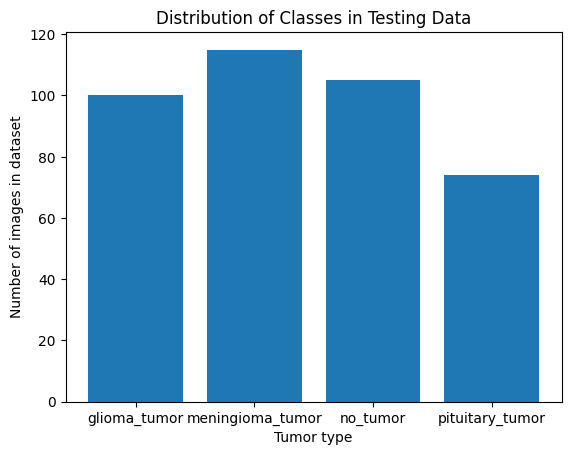

In [41]:
plt.bar(x = test_unique, height = test_counts)
plt.xlabel("Tumor type")
plt.ylabel("Number of images in dataset")
plt.title("Distribution of Classes in Testing Data")
plt.show()